## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [8]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
#model.compile(loss="mean_squared_error", optimizer=optimizer)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.8745 - accuracy: 0.3540 - val_loss: 1.8678 - val_accuracy: 0.3608
Epoch 2/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.8623 - accuracy: 0.3587 - val_loss: 1.8557 - val_accuracy: 0.3625
Epoch 3/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.8515 - accuracy: 0.3622 - val_loss: 1.8462 - val_accuracy: 0.3601 1.8517 - accuracy: 0.36
Epoch 4/500
50000/50000 [==============================] - 12s 233us/step - loss: 1.8419 - accuracy: 0.3636 - val_loss: 1.8371 - val_accuracy: 0.3694
Epoch 5/500
50000/50000 [==============================] - 23s 454us/step - loss: 1.8330 - accuracy: 0.3678 - val_loss: 1.8281 - val_accuracy: 0.3703.36 - ETA: 0s - loss: 1.8335 - accuracy: 
Epoch 6/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.8248 - accuracy: 0.3700 - val_loss: 1.8218 - val_accura

50000/50000 [==============================] - 10s 204us/step - loss: 1.6516 - accuracy: 0.4264 - val_loss: 1.6532 - val_accuracy: 0.4285- loss: 1.6438 - accuracy:  - ETA: 8s - loss: 1.6452 - accuracy: 0. - ETA: 7s - loss: 1.6452 - accura - ETA: 7s - loss: 1.6498 - accuracy: 0.42 - ETA: 7s - loss: 1.6485 - accura - ETA: 6s - loss: 1.6460 - accura - ETA: 6s - loss: 1.6472  - ETA: 5s - loss: 1.6484 - ac - ETA: 5s - loss: 1.6482 - accuracy:  - ETA: 4s - loss: 1.648 - ETA: 3s - loss: 1.6520 - accuracy: 0.42 - ETA: 3s - loss: 1.6513 - ac - ETA: 3s - loss: 1.6517 - accu - ETA: 2s - loss: 1.6508 - accuracy: 0. - ETA: 2s - los - ETA: 1s - loss: 1.6 - ETA: 0s - loss: 1.6517 - accura - ETA: 0s - loss: 1.6515 - accuracy: 0.42
Epoch 45/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.6485 - accuracy: 0.4272 - val_loss: 1.6513 - val_accuracy: 0.4272 7s - loss: 1.6459 - accuracy:  - ETA: 7s - loss: 1.6442 - accu - ETA: 6s - loss: 1.6455 - accuracy: 0. - ETA: 6s - loss: 1.6

50000/50000 [==============================] - 13s 256us/step - loss: 1.6019 - accuracy: 0.4417 - val_loss: 1.6082 - val_accuracy: 0.4403s - loss: 1.6111 - accuracy: 0.4 - ETA: 16s - loss: 1.6110 - accuracy: 0.434 - ETA: 16s - loss: 1.6132 - accuracy: 0.43 - ETA: 15s - loss: 1.6153 - accurac - ETA: 12s - loss: 1.6112 - accuracy: 0.43 - ETA: 12s - loss: 1.6132 - acc - ETA: 10s - loss: 1.6128 - accuracy: 0.438 - ETA: 10s - loss: 1.6127 - a - ETA: 9s - loss: 1.6062 - accuracy:  - ETA: 9s - loss: 1.6071 - accuracy: 0.43 - ETA: 9s - loss: 1.606 - ETA: 8s - loss: 1.6054 - accuracy: 0. - ETA: 7s - loss: - ETA: 6s - loss: 1.6017 - accura - ETA: 6s - loss: 1.6038 - accuracy:  - ETA: 6s - loss: 1.6032 - accu - ETA: 5s - loss: 1.6032 - accuracy: 0. - ETA: 5s - loss: 1.6032 - accuracy - ETA: 5s - loss: 1.6024 - accuracy:  - ETA: 5s - loss: 1.6030 - accuracy: 0. - ETA: 5s - loss: 1.603 - ETA: 4s - loss: 1.6043 - accu - ETA: 3s - loss: 1.6040 - accuracy: 0. - ETA: 3s - loss: 1.6043 - accuracy: 0.44 

50000/50000 [==============================] - 12s 246us/step - loss: 1.5826 - accuracy: 0.4490 - val_loss: 1.5884 - val_accuracy: 0.4450: 11s - loss: 1.5880 - accuracy: - ETA: 10s - loss: 1.5738 - accuracy: 0.45 - ETA: 10s - loss: 1.5761 - accuracy: 0.457 - ETA: 10s - loss: 1.5776 - accuracy: 0.4 - ETA: 10s - loss: 1.5857 - accuracy: 0.453 - ETA: 10s - loss: 1.5890 - accurac - ETA: 9s - loss: 1.5822 - accuracy: 0.453 - ETA: 9s - loss: 1.5816 - accuracy: 0. - ETA: 9s - loss: 1.5801 - accuracy: 0. - ETA: 9s - loss: 1.5800 - accuracy: 0. - ETA: 9s - loss: 1.5810 - accuracy:  - ETA: 9s - - ETA: 8s - loss: 1.5849 - accuracy - ETA: 8s - loss: 1.5868 - accuracy: 0.44 - ETA: 7s - loss: 1.5889 - accuracy: 0.44 - ETA: 7s - - ETA: 6s - loss: 1.5837 - accuracy: 0.45 - ETA: 6s - loss: 1.5837 - accuracy - ETA - ETA: 5s - loss: 1.5786 - accuracy: 0.45 - ETA: 4s - loss: 1.5784 - ac - ETA: 4s - loss: 1.5792 - accuracy:  - ETA: 4s - loss: 1.5802 - accuracy: 0. - ETA: 4s - loss: 1.5809 - accuracy: 0.45 

50000/50000 [==============================] - 17s 339us/step - loss: 1.5535 - accuracy: 0.4591 - val_loss: 1.5673 - val_accuracy: 0.4547 15s - loss: 1.546 - ETA: 15s - loss: 1.5600 - accuracy - ETA: 14s - loss: 1.5568 - accuracy: 0.4 - ETA: 13s - loss: 1.55 - ETA: 7s - loss: 1.5564 - accuracy - ETA: 6s - loss: 1 - - ETA: 3s - loss: 1.5552 - accuracy: 0. - ETA: 3s - loss: 1.5550 - accuracy: 0. - ETA: 3s - loss: 1.5551 - accu - ETA: 3s - loss: 1.555 - ETA: 2s - loss: 1.5541 - accuracy: 0. - ETA: 2s - loss: 1.5539  - ETA: 1s - loss: 1.5530 -  - ETA: 0s - loss: 1.5524 - accuracy:  - ETA: 0s - loss: 1.5523 - accuracy:  - ETA: 0s - loss: 1.5528 - accuracy: 0.45 - ETA: 0s - loss: 1.5531 - accuracy
Epoch 84/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.5513 - accuracy: 0.4605 - val_loss: 1.5657 - val_accuracy: 0.4510
Epoch 85/500
50000/50000 [==============================] - 15s 306us/step - loss: 1.5492 - accuracy: 0.4597 - val_loss: 1.5644 - val_accuracy: 0.45

50000/50000 [==============================] - 10s 192us/step - loss: 1.5038 - accuracy: 0.4759 - val_loss: 1.5263 - val_accuracy: 0.4614s - loss: 1.4980 - accuracy:  - ETA: 5s - loss: 1.4985 - accuracy: 0. - ETA: 5s - loss: 1.4992 - accuracy:  - ETA: 4s - loss: 1.5004 - accuracy: 0.47 - ETA: 4s - loss: 1.500 - ETA: 4s - loss: 1.5060 - accura - ETA: 3s - loss: 1.5059 - accura - ETA: 3s - loss: 1.5075 - accuracy: 0.47 - ETA: 3s - loss: 1.5066 - accuracy - ETA: 2s - loss: 1.5053 - accuracy: 0.47 - ETA: 2s - loss: - E
Epoch 110/500
50000/50000 [==============================] - 9s 189us/step - loss: 1.5017 - accuracy: 0.4772 - val_loss: 1.5258 - val_accuracy: 0.4656: 1s - loss: 1.5048 - accuracy: 0. - ETA: 1s - loss: 1.5046 - accuracy: 0. - ETA: 1s - loss: - ETA: 0s - loss: 1.5025 - accuracy:  - ETA: 0s - loss: 1.5022 - accuracy
Epoch 111/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.4998 - accuracy: 0.4772 - val_loss: 1.5316 - val_accuracy: 0.4601
Epoch 112/5

50000/50000 [==============================] - 9s 177us/step - loss: 1.4401 - accuracy: 0.4982 - val_loss: 1.4832 - val_accuracy: 0.4760
Epoch 148/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.4384 - accuracy: 0.4989 - val_loss: 1.4799 - val_accuracy: 0.4792
Epoch 149/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.4372 - accuracy: 0.4985 - val_loss: 1.4853 - val_accuracy: 0.47436s - loss: 1.4418 - accuracy: 0.49 - ETA: 6s - loss: 1.4415 - accuracy:  - ETA: 4s - loss: 1.4367 - accuracy: 0.50 - ETA: 4s - loss: 1.4364 - accuracy: 0.50 - ETA: 4s - loss: 1.4363 - accuracy - ETA: 3s - loss: 1.4337 - accuracy
Epoch 150/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.4354 - accuracy: 0.4998 - val_loss: 1.4802 - val_accuracy: 0.47670s - loss: 1.4348 - accu
Epoch 151/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.4341 - accuracy: 0.4989 - val_loss: 1.4791 - val_accuracy: 0.4774
Epoch 1

50000/50000 [==============================] - 10s 203us/step - loss: 1.3836 - accuracy: 0.5166 - val_loss: 1.4446 - val_accuracy: 0.4895 0s - loss: 1.3853 - accuracy: 0.51 - ETA: 0s - loss: 1.3844 - accu - ETA: 0s - loss: 1.3834 - accuracy:  - ETA: 0s - loss: 1.3835 - accuracy: 0.51
Epoch 186/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.3821 - accuracy: 0.5183 - val_loss: 1.4434 - val_accuracy: 0.4892s - loss: 1.3809 - accuracy:  - ETA: 5s - loss: 1.3765  - ETA: 4s - loss: 1.3802 - accuracy: 0.51 - ETA: 4s - loss:
Epoch 187/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.3804 - accuracy: 0.5176 - val_loss: 1.4477 - val_accuracy: 0.4857
Epoch 188/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.3794 - accuracy: 0.5189 - val_loss: 1.4497 - val_accuracy: 0.4855
Epoch 189/500
50000/50000 [==============================] - 9s 188us/step - loss: 1.3784 - accuracy: 0.5189 - val_loss: 1.4437 - val_accuracy: 0

50000/50000 [==============================] - 11s 224us/step - loss: 1.3232 - accuracy: 0.5387 - val_loss: 1.4168 - val_accuracy: 0.5029
Epoch 231/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.3217 - accuracy: 0.5392 - val_loss: 1.4101 - val_accuracy: 0.5022
Epoch 232/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.3209 - accuracy: 0.5397 - val_loss: 1.4083 - val_accuracy: 0.5023
Epoch 233/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.3191 - accuracy: 0.5403 - val_loss: 1.4123 - val_accuracy: 0.49761s - l
Epoch 234/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.3181 - accuracy: 0.5403 - val_loss: 1.4058 - val_accuracy: 0.5026
Epoch 235/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.3165 - accuracy: 0.5408 - val_loss: 1.4171 - val_accuracy: 0.4996TA: 2s - los
Epoch 236/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.3147

50000/50000 [==============================] - 9s 188us/step - loss: 1.2601 - accuracy: 0.5583 - val_loss: 1.3946 - val_accuracy: 0.50221s - loss: 1.2597  - ETA: 0s - loss: 1.2592 
Epoch 282/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.2592 - accuracy: 0.5613 - val_loss: 1.3864 - val_accuracy: 0.5133
Epoch 283/500
50000/50000 [==============================] - 14s 274us/step - loss: 1.2585 - accuracy: 0.5595 - val_loss: 1.3781 - val_accuracy: 0.5155
Epoch 284/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.2570 - accuracy: 0.5607 - val_loss: 1.3931 - val_accuracy: 0.5071
Epoch 285/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.2561 - accuracy: 0.5617 - val_loss: 1.3823 - val_accuracy: 0.5091
Epoch 286/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.2540 - accuracy: 0.5620 - val_loss: 1.3783 - val_accuracy: 0.5140
Epoch 287/500
50000/50000 [==============================] - 9

50000/50000 [==============================] - 9s 177us/step - loss: 1.2009 - accuracy: 0.5803 - val_loss: 1.3632 - val_accuracy: 0.5175
Epoch 334/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.1993 - accuracy: 0.5836 - val_loss: 1.3669 - val_accuracy: 0.5163
Epoch 335/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.1984 - accuracy: 0.5828 - val_loss: 1.3539 - val_accuracy: 0.5229
Epoch 336/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.1981 - accuracy: 0.5833 - val_loss: 1.3565 - val_accuracy: 0.5186
Epoch 337/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.1968 - accuracy: 0.5836 - val_loss: 1.3762 - val_accuracy: 0.5092
Epoch 338/500
50000/50000 [==============================] - 11s 213us/step - loss: 1.1956 - accuracy: 0.5833 - val_loss: 1.3613 - val_accuracy: 0.5178
Epoch 339/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.1934 - accuracy: 0.58

50000/50000 [==============================] - 10s 192us/step - loss: 1.1504 - accuracy: 0.6004 - val_loss: 1.3833 - val_accuracy: 0.5098A: 1s - loss: 1 - ETA: 0s - loss: 1.1503 - accu
Epoch 379/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.1503 - accuracy: 0.5989 - val_loss: 1.3689 - val_accuracy: 0.5187loss: 1.1636 - accuracy: 0. - ETA: 7s - loss: 1.1572 -  - ETA - ETA: 3s - loss: 1.1441  - ETA: 2s - loss: 1.1460 - accuracy: 0. - ETA: 2s - - ETA: 0s - loss: 1.151
Epoch 380/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.1487 - accuracy: 0.5993 - val_loss: 1.3969 - val_accuracy: 0.51084s - loss: 1.1525 - accuracy: 0.59 - ETA: 4s - loss:
Epoch 381/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.1490 - accuracy: 0.5993 - val_loss: 1.3477 - val_accuracy: 0.5251
Epoch 382/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.1471 - accuracy: 0.6003 - val_loss: 1.3507 - val_accuracy: 0.

50000/50000 [==============================] - 10s 205us/step - loss: 1.1318 - accuracy: 0.6052 - val_loss: 1.3399 - val_accuracy: 0.5242 - loss: 1.095 - ETA: 8s - loss: 1.113 - ETA: 7s - loss: 1.1245 - accuracy: 0.60 - ETA: 7s - loss: 1.1248 - accuracy: 0.60 - ETA: 7s - loss: 1.1249 - accuracy: 0.60 - ETA: 7s - loss: 1.1237  - ETA: 6s - loss: 1.1221 - accuracy: 0.60 - ETA: 6s - loss: 1.1216 - accuracy: 0.60 - ETA: 6s - loss: 1.1220 - accuracy:  - ETA: 5s - loss: 1.1226 - accura - ETA: 5s - loss: 1.1236 - accuracy:  - ETA: 5s - loss: 1.1227 - accuracy: 0.60 - ETA: 5s - loss: 1.1235 - accuracy: 0. - ETA: 4s - loss: 1.1241 - accuracy: 0.60 - ETA: 4s - loss: 1.1245 - accuracy:  - ETA: 4s - loss: 1.1236 - accuracy: 0. - ETA: 4s - loss: 1.125 - ETA: 3s - loss: 1.1285 - accuracy: 0.60 - ETA: 3s - loss: 1.1285  - ETA: 2s - loss: 1.1285 - accuracy - ETA: 2s - loss: 1.1281 - accuracy: 0. - ETA: 1s - loss: 1.1267 - accuracy: 0.60 - ETA: 1s - loss: 1.1266 - accuracy - ETA: 1s - loss: 1.1265 - acc

50000/50000 [==============================] - 10s 203us/step - loss: 1.1237 - accuracy: 0.6106 - val_loss: 1.3711 - val_accuracy: 0.5179- loss: 1 - ETA: 7s - loss: 1.1170 - accuracy: 0. - ETA: 6s - loss: 1.1144 - accuracy:  - ETA: 6s - loss: 1.1175 - accura - ETA: 6s - loss: 1.1187 - accuracy: 0.61 - ETA: 6s - loss: 1.1184 - accuracy:  - ETA: 5s - loss: 1.1165 - accu - ETA: 5s - loss: 1.1161 - accuracy: 0. - ETA: 5s - loss: 1.116 - ETA: 4s - loss: 1.1165 - accuracy: 0. - ETA: 4s - loss: 1.1171 - accuracy:  - ETA: 3s - loss: 1.1165 - accuracy: 0. - ETA: 3s - loss: 1.1184 - accuracy - ETA: 3s - loss: 1.1210 - accuracy: 0. - ETA: 3s - loss: 1.1211 - accuracy: 0.61 - ETA: 3s - loss: 1.1217 - accuracy: 0.61 - ETA: 3s - loss: 1.1224 - accuracy: 0.60 - ETA: 2s - loss: 1.1217 - accuracy: 0.61 - ETA: 2s - loss: 1.1203 - accura - ETA: 2s - loss: 1.1203 - accuracy: 0. - ETA: 2s - loss: 1.1198 - accuracy: 0.61 - ETA: 2s - loss: 1.1201 - accura - ETA: 1s - loss: 1.1195 - accu - ETA: 1s - loss: 1.1

50000/50000 [==============================] - 10s 206us/step - loss: 1.1157 - accuracy: 0.6117 - val_loss: 1.3446 - val_accuracy: 0.5280ss: 1.1071 - ac - ETA: 7s - loss: 1.1164 - accu - ETA: 6s - loss: 1.1123  - ETA: 6s - loss: 1.1151 - ac - ETA: 5s - loss: 1.1162 -  - ETA: 5s - loss: 1.1154 - accura - ETA: 4s - loss: 1.1133 - accuracy: 0.61 - ETA: 4s - loss: 1.1111 - accu - ETA: 4s - loss: 1.1150 - accuracy:  - ETA: 4s - loss: 1.1166 - accu - ETA: 3s - loss: 1.1159 - accura - ETA: 3s - loss: 1.1154 - accuracy:  - ETA: 2s - loss: 1.1151 - accuracy:  - ETA: 2s - loss: 1.1146 - accura - ETA: 2s - loss: - ETA: 1s - loss: 1.1155 - accuracy: 0.61 - ETA: 1s - loss: 1.1155 - accuracy:  - ETA: 0s - loss: 1.1152 - accuracy:  - ETA: 0s - loss: 1.1153 - accuracy: 0. - ETA: 0s - loss: 1.1146 - accuracy: 0. - ETA: 0s - loss: 1.1151 - accuracy: 0.
Epoch 413/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.1127 - accuracy: 0.6124 - val_loss: 1.3930 - val_accuracy: 0.5087
E

50000/50000 [==============================] - 9s 174us/step - loss: 1.0686 - accuracy: 0.6289 - val_loss: 1.3525 - val_accuracy: 0.5243
Epoch 457/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.0680 - accuracy: 0.6279 - val_loss: 1.3619 - val_accuracy: 0.5265
Epoch 458/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.0645 - accuracy: 0.6296 - val_loss: 1.3293 - val_accuracy: 0.5380
Epoch 459/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.0637 - accuracy: 0.6321 - val_loss: 1.3451 - val_accuracy: 0.5255
Epoch 460/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.0661 - accuracy: 0.6293 - val_loss: 1.3511 - val_accuracy: 0.5251
Epoch 461/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.0638 - accuracy: 0.6308 - val_loss: 1.3568 - val_accuracy: 0.5243
Epoch 462/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.0630 - accuracy: 0.6304

50000/50000 [==============================] - 10s 192us/step - loss: 1.0245 - accuracy: 0.6451 - val_loss: 1.3523 - val_accuracy: 0.5316 6s - loss: 1.0342 - accuracy - ETA: 5s - loss: 1.0309 -  - ETA: 5s - loss: 1.0269 - accura - ETA: 4s - loss: 1.0239 - accuracy:  - ETA: 4s - loss: 1.0221 - accura - ETA: 3s - loss: 1.0231 - accuracy: 0. - ETA: 3s - loss: 1.0224 - accuracy: 0. - ETA: 3s - loss: 1.0226 - accura - ETA: 3s - loss: 1.0217 -  - ETA: 2s - loss: 1.020 - ETA: 1s - loss: 1.0218 - accuracy: 0. - ETA: 1s - los - ETA: 0s - loss: 1.0237 - accuracy
Epoch 499/500
50000/50000 [==============================] - 9s 190us/step - loss: 1.0267 - accuracy: 0.6428 - val_loss: 1.3490 - val_accuracy: 0.5268.0222 - accuracy - ETA: 5s - loss: 1.0219  - ETA: 2s - loss: 1.0313 - accuracy:  - ETA: 2s - loss: - ETA: 1s - loss: 1.0284 - accuracy - ETA: 1s - loss: 1.0275 - accuracy:  - ETA: 0s - loss: 1.0278 - accuracy: 0. - ETA: 0s - loss: 1.0277 - 
Epoch 500/500
50000/50000 [=======================

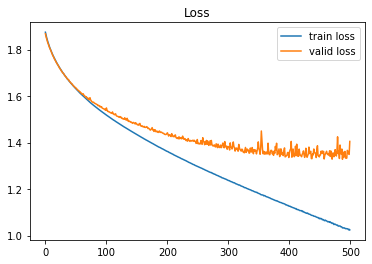

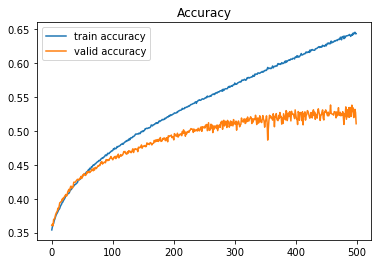

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()